# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [52]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [54]:
print(project_data.shape)
project_data.head(1)

(109248, 17)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

  project_subject_categories project_subject_subcategories  \
0        Literacy & Language                 ESL, Literacy   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0

In [55]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [56]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [57]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [0]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

# join two dataframes in python: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas-dataframe-merge
project_data = pd.merge(project_data, price_data, on='id', how='left')


In [59]:
print(project_data.shape)
project_data.head(1)

(109248, 19)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   

   quantity  
0         4

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [63]:
new_data = project_data
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [65]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[10000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [67]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [68]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [69]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

__essay preprocessing__

In [71]:
# Combining all the above stundents 
from tqdm import tqdm
essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:10<00:00, 1546.06it/s]


In [72]:
# after preprocesing
essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

__Project_title preprocessing__

In [73]:
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 32937.33it/s]


In [74]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [75]:
project_data.dtypes

Unnamed: 0                                               int64
id                                                      object
teacher_id                                              object
teacher_prefix                                          object
school_state                                            object
Date                                            datetime64[ns]
project_grade_category                                  object
project_title                                           object
project_essay_1                                         object
project_essay_2                                         object
project_essay_3                                         object
project_essay_4                                         object
project_resource_summary                                object
teacher_number_of_previously_posted_projects             int64
project_is_approved                                      int64
price                                                  

In [76]:
# replace the essay and title by prprocessed essay and title
project_data['essay'] = essays
project_data['project_title'] = titles

# to select required columns: https://stackoverflow.com/a/11287278
project_data = project_data[['school_state','clean_categories', 'clean_subcategories','project_grade_category','teacher_prefix',
                             'project_title', 'essay', 'project_resource_summary',
                             'quantity', 'teacher_number_of_previously_posted_projects','price',
                             'project_is_approved']]
print(project_data.shape)
project_data.head(1)

(109248, 12)


school_state clean_categories                 clean_subcategories  \
0           CA     Math_Science  AppliedSciences Health_LifeScience   

  project_grade_category teacher_prefix                        project_title  \
0          Grades PreK-2           Mrs.  engineering steam primary classroom   

                                               essay  \
0  fortunate enough use fairy tale stem kits clas...   

                            project_resource_summary  quantity  \
0  My students need STEM kits to learn critical s...         4   

   teacher_number_of_previously_posted_projects   price  project_is_approved  
0                                            53  725.05                    1

In [0]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [0]:
#split the data into train, cv and test using train_test_split
X = project_data[['school_state','clean_categories', 'clean_subcategories','project_grade_category','teacher_prefix',
                  'project_title', 'essay', 'project_resource_summary',
                  'quantity', 'teacher_number_of_previously_posted_projects','price']].copy()
Y = project_data[['project_is_approved']]

#data into test, train, and cv
# K-fold use x1, y1 as train data
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)


In [79]:
print('Shape of test', x_test.shape)
print('Shape of train', x_train.shape)

Shape of test (32775, 11)
Shape of train (76473, 11)


## 1.5 Preparing data for models

In [80]:
project_data.columns

Index(['school_state', 'clean_categories', 'clean_subcategories',
       'project_grade_category', 'teacher_prefix', 'project_title', 'essay',
       'project_resource_summary', 'quantity',
       'teacher_number_of_previously_posted_projects', 'price',
       'project_is_approved'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

#### 1.5.1.3 For 'state'

In [81]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in x_train['school_state'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase = False, binary = True)
vectorizer.fit(x_train['school_state'])
print(vectorizer.get_feature_names())

print('='*100)
state_train = vectorizer.transform(x_train['school_state'].values)
print("Shape of matrix after one hot encodig ",state_train.shape)

print('='*100)
state_test = vectorizer.transform(x_test['school_state'].values)
print("Shape of matrix after one hot encodig ",state_test.shape)

#store the features in a list
features_name = []
features_name = features_name + vectorizer.get_feature_names()
print('='*50, '\nlength of features_name is:', len(features_name))

['VT', 'WY', 'ND', 'MT', 'SD', 'RI', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'KY', 'OR', 'MS', 'NV', 'MD', 'TN', 'CT', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'IN', 'MO', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encodig  (76473, 51)
Shape of matrix after one hot encodig  (32775, 51)
length of features_name is: 51


#### 1.5.1.1 for 'clean_categories'

In [82]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['clean_categories'])

categories_train = vectorizer.transform(x_train['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_train.shape)

print('='*100)
categories_test = vectorizer.transform(x_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_test.shape)

#store the features in a list
features_name = features_name + vectorizer.get_feature_names()
print('='*50, '\nlength of features_name is:', len(features_name))

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (76473, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (32775, 9)
length of features_name is: 60


#### 1.5.1.2 For 'clean_subcategories'

In [83]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['clean_subcategories'])

sub_categories_train = vectorizer.transform(x_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_train.shape)

print('='*100)
sub_categories_test = vectorizer.transform(x_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_test.shape)

#store the features in a list
features_name = features_name + vectorizer.get_feature_names()
print('='*50, '\nlength of features_name is:', len(features_name))

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (76473, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_We

#### 1.5.1.5 For 'project_grade_category'

In [84]:
# do the similar feature encoding with project_grade_category 
# with grouping by prefix
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in x_train['project_grade_category'].values:
    my_counter.update(word.split('.'))

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase = False, binary = True)
vectorizer.fit(x_train['project_grade_category'].values)
print(vectorizer.get_feature_names())

print('='*50)
grade_train = vectorizer.transform(x_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_train.shape)

print('='*50)
grade_test = vectorizer.transform(x_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_test.shape)

#store the features in a list
features_name = features_name + vectorizer.get_feature_names()
print('='*50, '\nlength of features_name is:', len(features_name))

['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']
Shape of matrix after one hot encodig  (76473, 4)
Shape of matrix after one hot encodig  (32775, 4)
length of features_name is: 94


#### 1.5.1.4 For 'teacher_prefix'

In [85]:
# Please do the similar feature encoding with teacher_prefix 
# with grouping by prefix
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in x_train['teacher_prefix'].values:
    my_counter.update(str(word).split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict = dict(my_counter)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_prefix_dict.keys()), lowercase = False, binary = True)
# error: np.nan is an invalid document, expected byte or unicode string.
# to remove error : https://stackoverflow.com/a/39308809
vectorizer.fit(x_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())
print('='*50)

prefix_train = vectorizer.transform(x_train['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",prefix_train.shape)

print('='*50)
prefix_test = vectorizer.transform(x_test['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",prefix_test.shape)

#store the features in a list
features_name = features_name + vectorizer.get_feature_names()
print('='*50, '\nlength of features_name is:', len(features_name))

['nan', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (76473, 6)
Shape of matrix after one hot encodig  (32775, 6)
length of features_name is: 100


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words with bi-gram

__Essay__

In [86]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# to reduce the dimensionality max_size = 5000
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
  
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=10, max_features = 5000)
vectorizer.fit(x_train['essay'])

text_bow_train = vectorizer.transform(x_train['essay'])
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

text_bow_test = vectorizer.transform(x_test['essay'])
print("Shape of matrix after one hot encodig ",text_bow_test.shape)


Shape of matrix after one hot encodig  (76473, 5000)
Shape of matrix after one hot encodig  (32775, 5000)


In [87]:
Bow_features_name = features_name + vectorizer.get_feature_names()
print('\nlength of Bow_features_name is:', len(Bow_features_name)) 


length of Bow_features_name is: 5100


__Title__

In [88]:
# you can vectorize the title also 
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=10,max_features = 5000)
vectorizer.fit(x_train['project_title'])

title_bow_train = vectorizer.transform(x_train['project_title'])
print("Shape of matrix after one hot encodig ",title_bow_train.shape)

title_bow_test = vectorizer.transform(x_test['project_title'])
print("Shape of matrix after one hot encodig ",title_bow_test.shape)


Shape of matrix after one hot encodig  (76473, 4752)
Shape of matrix after one hot encodig  (32775, 4752)


In [89]:
Bow_features_name = Bow_features_name + vectorizer.get_feature_names()
print('\nlength of BoW_features_name is:', len(Bow_features_name))


length of BoW_features_name is: 9852


#### 1.5.2.2 TFIDF vectorizer with bi-gram

__Essay__

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=10, max_features = 5000)
vectorizer.fit(x_train['essay'])

text_tfidf_train = vectorizer.transform(x_train['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)

text_tfidf_test = vectorizer.transform(x_test['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)


Shape of matrix after one hot encodig  (76473, 5000)
Shape of matrix after one hot encodig  (32775, 5000)


In [91]:
tfidf_features_name = features_name + vectorizer.get_feature_names()
print('\nlength of Bow_features_name is:', len(tfidf_features_name)) 


length of Bow_features_name is: 5100


__Title__

In [92]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=10, max_features = 5000)
vectorizer.fit(x_train['project_title'])

title_tfidf_train = vectorizer.transform(x_train['project_title'])
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

title_tfidf_test = vectorizer.transform(x_test['project_title'])
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)



Shape of matrix after one hot encodig  (76473, 4752)
Shape of matrix after one hot encodig  (32775, 4752)


In [93]:
tfidf_features_name = tfidf_features_name + vectorizer.get_feature_names()
print('\nlength of Bow_features_name is:', len(tfidf_features_name)) 


length of Bow_features_name is: 9852


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [94]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================

768it [00:00, 7679.11it/s]

Loading Glove Model


1917495it [03:43, 8588.15it/s]

Done. 1917495  words loaded!


'Output:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n'

In [95]:
words = []
for i in project_data['essay']:
    words.extend(i.split(' '))

for i in project_data['project_title']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

all the words in the coupus 15495364
the unique words in the coupus 58829
The number of words that are present in both glove vectors and our coupus 51363 ( 87.309 %)
word 2 vec length 51363


__I'll be using inly 50 dimensions of Glove instead of 300 dimensions__

__Essay__

In [96]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_test = []  # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word][0:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test.append(vector)

print('\n',len(avg_w2v_test))
print(len(avg_w2v_test[0]))


100%|██████████| 32775/32775 [00:09<00:00, 3353.72it/s]


 32775
50


In [97]:
# for train
avg_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word][0:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train.append(vector)

print('\n',len(avg_w2v_train))
print(len(avg_w2v_train[0]))

100%|██████████| 76473/76473 [00:22<00:00, 3385.50it/s]


 76473
50


__Title__

In [98]:
# test
# compute average word2vec for each review.
avg_w2v_test1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['project_title']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word][0:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test1.append(vector)

print('\n',len(avg_w2v_test1))
print(len(avg_w2v_test1[0]))


100%|██████████| 32775/32775 [00:00<00:00, 74261.52it/s]


 32775
50


In [99]:
# for train
avg_w2v_train1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['project_title']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word][0:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train1.append(vector)

print('\n',len(avg_w2v_train1))
print(len(avg_w2v_train1[0]))


100%|██████████| 76473/76473 [00:01<00:00, 73551.80it/s]


 76473
50


#### 1.5.2.4 Using Pretrained Models: TFIDF weighted W2V

__Essay__

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [101]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][0:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test.append(vector)

print('\n',len(tfidf_w2v_test))
print(len(tfidf_w2v_test[0]))


100%|██████████| 32775/32775 [01:03<00:00, 515.71it/s]


 32775
50


In [102]:
# for train
tfidf_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][0:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train.append(vector)

print('\n',len(tfidf_w2v_train))
print(len(tfidf_w2v_train[0]))

100%|██████████| 76473/76473 [02:27<00:00, 517.82it/s]


 76473
50


__Project Title__

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [104]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['project_title']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][0:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test1.append(vector)

print('\n',len(tfidf_w2v_test1))
print(len(tfidf_w2v_test1[0]))

100%|██████████| 32775/32775 [00:00<00:00, 37634.22it/s]


 32775
50


In [105]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['project_title']): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][0:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train1.append(vector)

print('\n',len(tfidf_w2v_train1))
print(len(tfidf_w2v_train1[0]))

100%|██████████| 76473/76473 [00:02<00:00, 36852.57it/s]


 76473
50


### 1.5.3 Vectorizing Numerical features

__Price__

In [106]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(x_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
# for test
price_test = price_scalar.transform(x_test['price'].values.reshape(-1, 1))

#for train
price_train= price_scalar.transform(x_train['price'].values.reshape(-1, 1))


Mean : 297.17304286803966, Standard deviation : 372.34322368381646


__quantity__

In [107]:
price_scalar = StandardScaler()
price_scalar.fit(x_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
#for test
q_test = price_scalar.transform(x_test['quantity'].values.reshape(-1, 1))

# for train
q_train = price_scalar.transform(x_train['quantity'].values.reshape(-1, 1))


Mean : 17.015011441647598, Standard deviation : 26.695778892170775


__Number of previously submitted__

In [108]:
price_scalar = StandardScaler()
price_scalar.fit(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
# for test
p_test = price_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

# for train
p_train = price_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


Mean : 11.250892448512586, Standard deviation : 28.19567343312978


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [109]:
x_train.dtypes

school_state                                     object
clean_categories                                 object
clean_subcategories                              object
project_grade_category                           object
teacher_prefix                                   object
project_title                                    object
essay                                            object
project_resource_summary                         object
quantity                                          int64
teacher_number_of_previously_posted_projects      int64
price                                           float64
dtype: object

## Applying Logistics Regression

### Some inportant function to avoid repetiton of code

__Giving class weight to deal with imabalence data__

In [0]:
a = y_train['project_is_approved'].value_counts()
cl_weight = {0: round(a[1]/(a[0]+a[1]),2), 1: round(a[0]/(a[0]+a[1]), 2)}

In [153]:
print(a)
cl_weight

1    64924
0    11549
Name: project_is_approved, dtype: int64


{0: 0.85, 1: 0.15}

In [0]:
# ROC plot : https://stackoverflow.com/a/38467407

def roc_curve(fpr, tpr, auc, fpr1, tpr1, auc1):
  
    plt.figure(figsize = (8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b-', label = 'AUC_curve_test with AUC=' + str(auc))
    plt.plot(fpr1, tpr1, 'g-', label = 'AUC_curve_train with AUC=' + str(auc1))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on') 
    plt.show()

In [0]:
# for AUC vs log10(alpha)

def auc_C_plot(k, train_auc, cv_auc):
    plt.figure(figsize = (10,6))
    plt.plot(k, train_auc, 'bo-', label = 'Train AUC')
    plt.plot(k, cv_auc, 'go-', label = 'cv AUC')
    plt.title('AUC of train and cv\nv/s C-hypreparameter')
    plt.legend()
    plt.grid('on')
    plt.xlabel('hyperparameter log10(C)\nwhere (C=1/lambda)')
    plt.ylabel('AUC')
    plt.show()

In [0]:
# function to tune the k-parameter
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

__This Function will plot the AUC vs log10(alpha), given train and cv data__

In [0]:
def Tune_C(X_train):
    '''Plot the train, cv AUC vs k-hyperparameter'''

    lamda = np.array([10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000])
    c = 1/lamda[::-1] #[::-1] is used to return the array in reverse order
    parameters = dict({ 'C': c}) 

    LR = LogisticRegression(penalty = 'l2', class_weight= cl_weight) #L2 norm
    clf = GridSearchCV(LR, parameters, scoring = 'roc_auc', cv = 5) 

    clf.fit(X_train, y_train)

    train_auc= clf.cv_results_['mean_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 

    auc_C_plot(np.log10(c), train_auc, cv_auc) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html#numpy-log10


__This function return the test and train auc, and print confusion matrix along with heatmap representation of confusion matrix__

In [0]:
def Test(best_C, X_test, X_train):
    '''returns the ROC plot, confusion matrix and AUC_test and AUC_train value'''
    clf = LogisticRegression(penalty = 'l2', C = best_C, class_weight= cl_weight) #L2 norm
    clf.fit(X_train, y_train)

    y_test_proba = clf.predict_proba(X_test)[:,1]
    y_train_proba = clf.predict_proba(X_train)[:,1]

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_train_proba)

    # to get the auc_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc =  round(metrics.auc(fpr, tpr),4)
    auc1 =  round(metrics.auc(fpr1, tpr1),4)

    # to plot the roc_curve
    roc_curve(fpr, tpr, auc, fpr1, tpr1, auc1)

    #confusion matrix with heatmap plot
    print('='*50)
    print("Train confusion matrix")
    a = confusion_matrix(y_train, clf.predict(X_train))
    print(a,'\n\n')
    sns.heatmap(a, annot=True, fmt="d", annot_kws={"size":15})
    plt.show()

    print('='*50)
    print("Test confusion matrix")
    a = confusion_matrix(y_test, clf.predict(X_test))
    print(a, '\n\n')
    sns.heatmap(a, annot=True, fmt="d", annot_kws={"size":15}) #https://seaborn.pydata.org/generated/seaborn.heatmap.html
    plt.show()

    return auc, auc1


## 2. Logistic Regression 
__Appling Logistic Regression on different kind of featurization as mentioned in the instructions__
* Apply Logistic Regression on different kind of featurization as mentioned in the instructions
*  For Every model that you work on make sure you do the step 2 and step 3 of instrucations

* hstack will be used for stacking the the sparse matrix

In [0]:
from scipy.sparse import hstack

### 2.1 Logistic Regression

#### 2.1.1 <font color='red'> Set 1 </font> : BoW with bi-gram

In [200]:
X_test =  hstack((state_test, categories_test,  sub_categories_test, grade_test, prefix_test,
                  title_bow_test, text_bow_test,price_test, q_test, p_test))

X_train =  hstack((state_train, categories_train,  sub_categories_train, grade_train, prefix_train,
                   title_bow_train, text_bow_train,price_train, q_train, p_train))

print(X_test.shape)
print(X_train.shape)

(32775, 9855)
(76473, 9855)


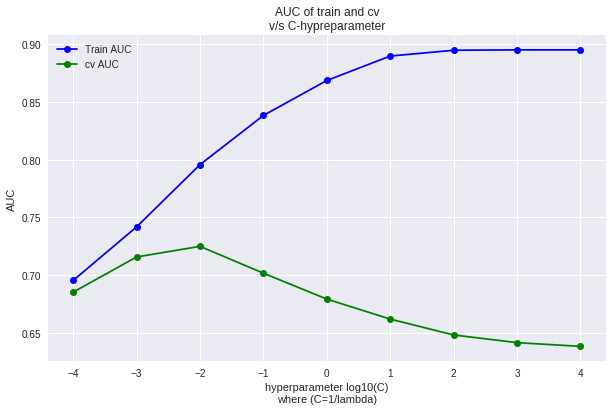

In [184]:
Tune_C(X_train)

* __C = 1/ lambda__
* For __very large value of C__ model will __overfit (= High Variance)__ beacuse lamda value will be very small corresponding to large C.
* For __very small value of C__ model will __underfit (= High Bias )__ because lamda value will be very large corresponding to small C.

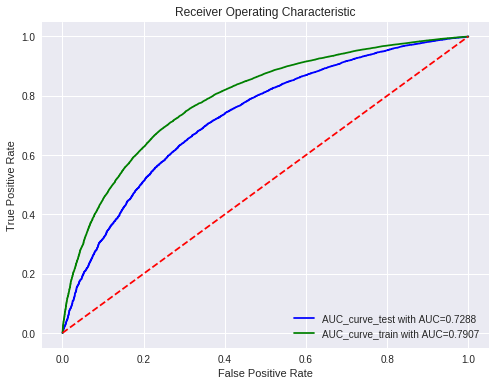

Train confusion matrix
[[ 8557  2992]
 [19361 45563]] 




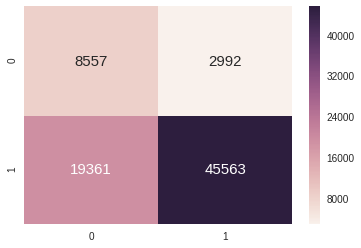

Test confusion matrix
[[ 3314  1679]
 [ 8812 18970]] 




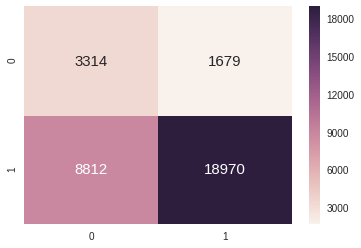

In [201]:
C1 = 10**-2 #(approx.)
auc1, auc11 = Test(C1, X_test,  X_train)

#### 2.1.2 <font color='red'> Set 2 </font> : TF-IDF with bi-gram

In [202]:
X_test =  hstack((state_test, categories_test,  sub_categories_test, grade_test, prefix_test, 
                  title_tfidf_test, text_tfidf_test, price_test, q_test, p_test))

X_train =  hstack((state_train, categories_train,  sub_categories_train, grade_train, prefix_train,
                   title_tfidf_train, text_tfidf_train, price_train, q_train, p_train))

print(X_test.shape)
print(X_train.shape)

(32775, 9855)
(76473, 9855)


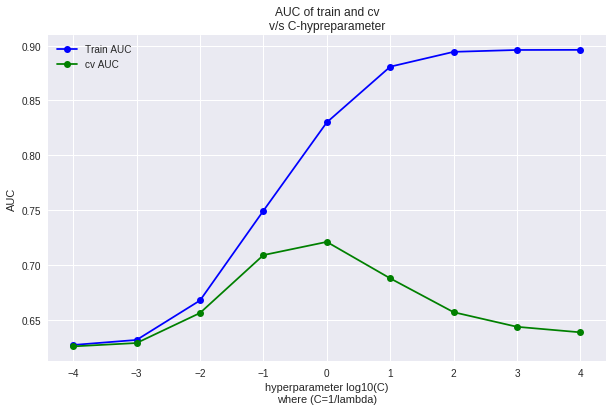

In [186]:
Tune_C(X_train)

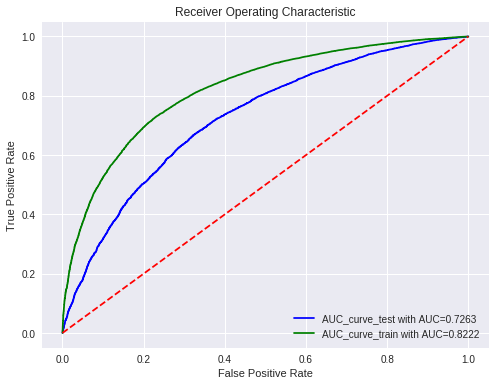

Train confusion matrix
[[ 8846  2703]
 [17368 47556]] 




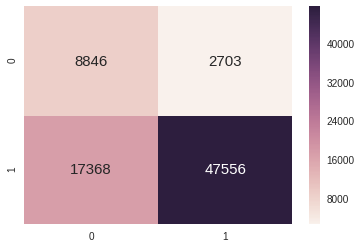

Test confusion matrix
[[ 3182  1811]
 [ 8197 19585]] 




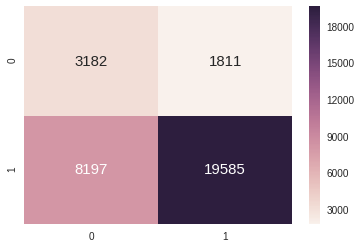

In [203]:
C2 = 10**0 #(approx.),  best parameter
auc2, auc21 = Test(C2, X_test,  X_train)

#### 2.1.3 <font color='red'> Set 3 </font> : Avg-W2V 

In [204]:
X_test =  hstack((state_test, categories_test,  sub_categories_test, grade_test, prefix_test,
                  avg_w2v_test1, avg_w2v_test, price_test, q_test, p_test))

X_train =  hstack((state_train, categories_train,  sub_categories_train, grade_train, prefix_train, 
                   avg_w2v_train1, avg_w2v_train, price_train, q_train, p_train))

print(X_test.shape)
print(X_train.shape)

(32775, 203)
(76473, 203)


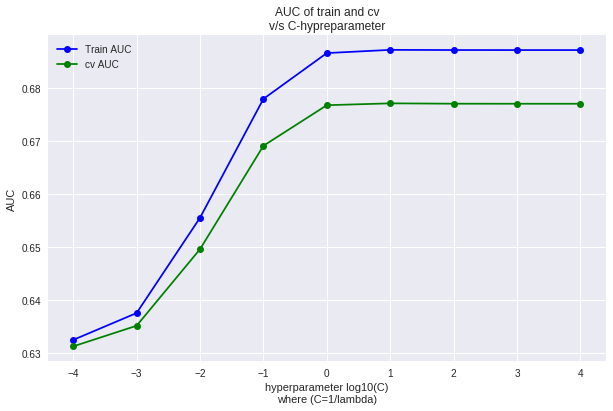

In [188]:
Tune_C(X_train)

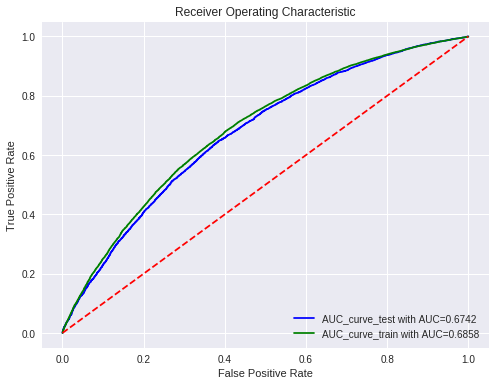

Train confusion matrix
[[ 7476  4073]
 [24254 40670]] 




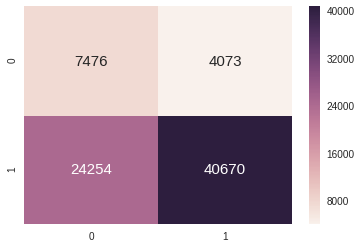

Test confusion matrix
[[ 3174  1819]
 [10463 17319]] 




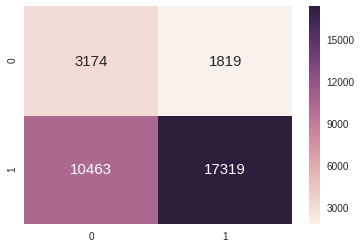

In [205]:
C3 = 10**0 #(approx.)
auc3, auc31 = Test(C3, X_test,  X_train)

#### 2.1.4 <font color='red'> Set 1 </font> : tfidf_W2V 

In [206]:
X_test =  hstack((state_test, categories_test,  sub_categories_test, grade_test, prefix_test,
                  tfidf_w2v_test1, tfidf_w2v_test, price_test, q_test, p_test))

X_train =  hstack((state_train, categories_train,  sub_categories_train, grade_train, prefix_train, 
                   tfidf_w2v_train1, tfidf_w2v_train, price_train, q_train, p_train))

print(X_test.shape)
print(X_train.shape)

(32775, 203)
(76473, 203)


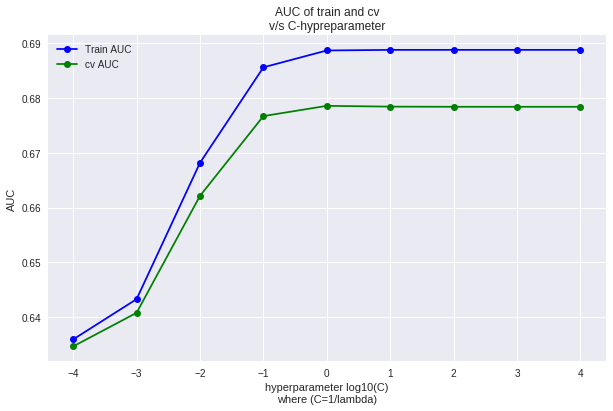

In [190]:
Tune_C(X_train)

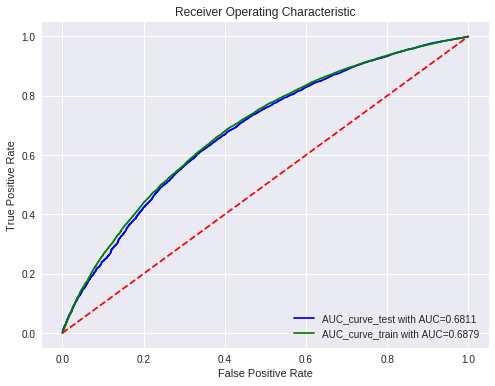

Train confusion matrix
[[ 7631  3918]
 [24973 39951]] 




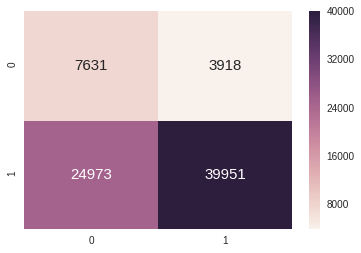

Test confusion matrix
[[ 3311  1682]
 [10889 16893]] 




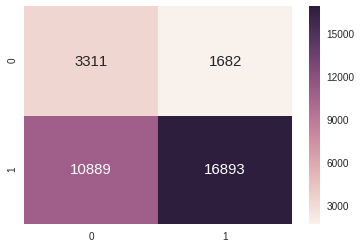

In [207]:
C4 = 10**0 #(approx.)
auc4, auc41 = Test(C4, X_test,  X_train)

### 2.2 [Task -2] Logistic Regression with added Features

In [191]:
# to counts the number of words: https://stackoverflow.com/a/37483537
a = new_data['project_title'].str.split()
b = new_data['essay'].str.split()

c = [len(a[i]) for i in range(len(a))] # number of words in title
d = [len(a[i]) for i in range(len(b))] # number of words in essay
  
# now add these to project_data
project_data['lenght_of_title'] = c
project_data['lenght_of_essay'] = d
project_data.head(1)

school_state clean_categories                 clean_subcategories  \
0           CA     Math_Science  AppliedSciences Health_LifeScience   

  project_grade_category teacher_prefix                        project_title  \
0          Grades PreK-2           Mrs.  engineering steam primary classroom   

                                               essay  \
0  fortunate enough use fairy tale stem kits clas...   

                            project_resource_summary  quantity  \
0  My students need STEM kits to learn critical s...         4   

   teacher_number_of_previously_posted_projects   price  project_is_approved  \
0                                            53  725.05                    1   

   lenght_of_title  lenght_of_essay  
0                4                4

In [0]:
X = project_data[['school_state','clean_categories', 'clean_subcategories','project_grade_category','teacher_prefix',
                  'project_title', 'essay', 'project_resource_summary',
                  'quantity', 'teacher_number_of_previously_posted_projects','price','lenght_of_title', 'lenght_of_essay']].copy()
Y = project_data[['project_is_approved']]

#data into test, train, and cv
# K-fold use x1, y1 as train data
x_test, x_test, y_test, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler

In [194]:
title_scaler = StandardScaler()
title_scaler.fit(x_test['lenght_of_title'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scaler.mean_[0]}, Standard deviation : {np.sqrt(title_scaler.var_[0])}")
# Now standardize the data with above maen and variance.
# for test
title_len_test = title_scaler.transform(x_test['price'].values.reshape(-1, 1))

#for train
title_len_train= title_scaler.transform(x_train['price'].values.reshape(-1, 1))

Mean : 3.6999847444698704, Standard deviation : 1.5357121797657167


In [195]:
essay_scalar = StandardScaler()
essay_scalar.fit(x_test['lenght_of_essay'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(essay_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
# for test
essay_len_test = essay_scalar.transform(x_test['price'].values.reshape(-1, 1))

#for train
essay_len_train = essay_scalar.transform(x_train['price'].values.reshape(-1, 1))

Mean : 3.6999847444698704, Standard deviation : 1.5357121797657167


__Mergigng all required features__

In [208]:
X_test =  hstack((state_test, categories_test,  sub_categories_test, grade_test, prefix_test, 
                  price_test, q_test, p_test, essay_len_test, title_len_test))

X_train =  hstack((state_train, categories_train,  sub_categories_train, grade_train, prefix_train, 
                   price_train, q_train, p_train, essay_len_train, title_len_train))

print(X_test.shape)
print(X_train.shape)

(32775, 105)
(76473, 105)


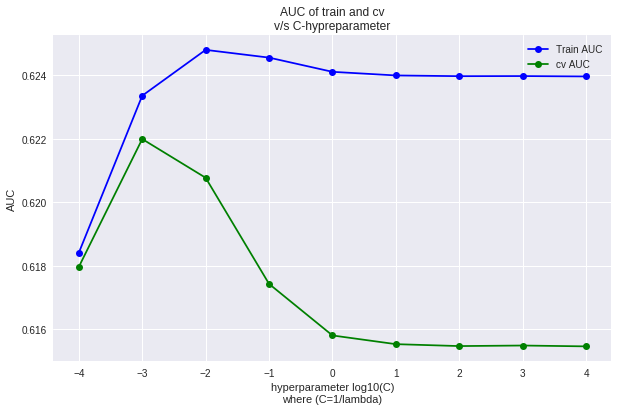

In [197]:
Tune_C(X_train)

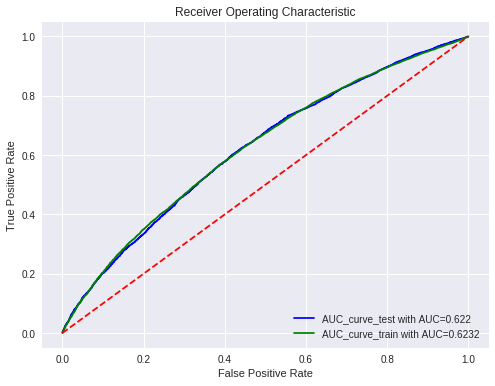

Train confusion matrix
[[ 6933  4616]
 [27333 37591]] 




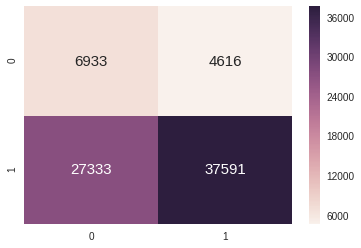

Test confusion matrix
[[ 2992  2001]
 [11712 16070]] 




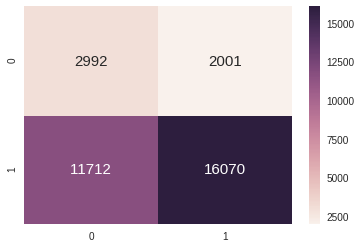

In [209]:
C5 = 10**-3#(approx.)
auc5, auc51 = Test(C5, X_test,  X_train)

__Let's use the model BoW (becasue it has max AUC value) with number of words in title and essay__

In [214]:
X_test =  hstack((state_test, categories_test,  sub_categories_test, grade_test, prefix_test,
                  title_bow_test, text_bow_test,price_test, q_test, p_test, essay_len_test, title_len_test))

X_train =  hstack((state_train, categories_train,  sub_categories_train, grade_train, prefix_train,
                   title_bow_train, text_bow_train,price_train, q_train, p_train, essay_len_train, title_len_train))

print(X_test.shape)
print(X_train.shape)

(32775, 9857)
(76473, 9857)


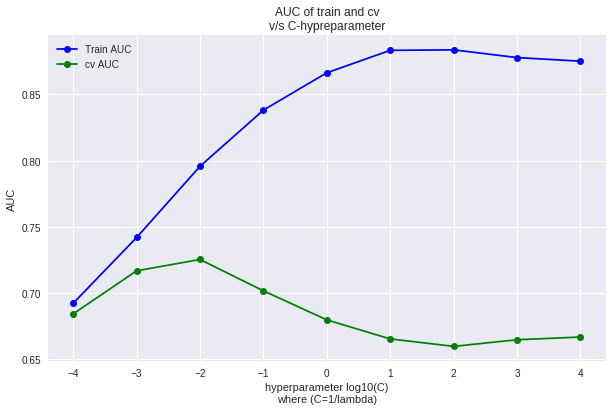

In [217]:
Tune_C(X_train)

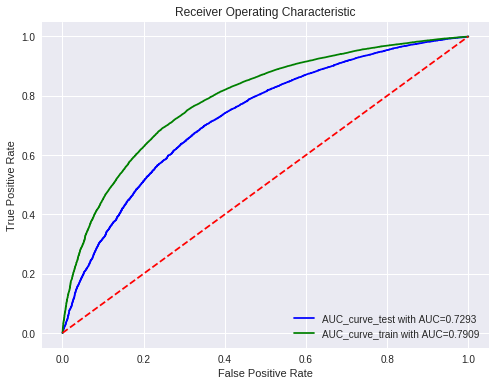

Train confusion matrix
[[ 8576  2973]
 [19462 45462]] 




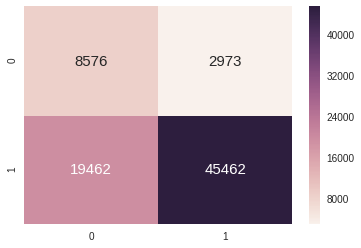

Test confusion matrix
[[ 3322  1671]
 [ 8833 18949]] 




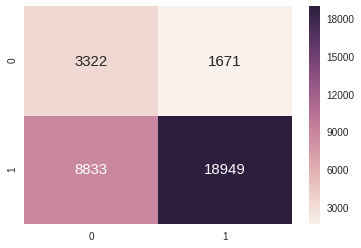

In [216]:
C6 = 10**-2
auc6, auc61 = Test(C6, X_test, X_train)

## 3. Conclusion

__Summary__
* Since the given dataset is imbalance, so class weight was given during training the model.
* __BoW (bi-gram)__ have __Max_test_AUC = 0.7288__ and __max_train_AUC = 0.7907__.
*  __TF-IDF (bi-gram)__ have __Max_test_AUC = 0.7263__ and __max_train_AUC = 0.8222__.
* Out of all (Bow, TF-IDF,  Avg-W2V, TF-IDF-W2V), __BoW (bi-gram) and TF-IDF (with bi-gram)__ is giving __maximum AUC__  (approximate same) value. 
* All model are __perfectly classifying class 1__ (approximately more than 95% time all model is correclty classifying the class 1).
* When we'll use __number of words in project title and essay__ (not including the vectorized text data), we'll get lower AUC (__test AUC = 0.622 and train AUC = 0.6232__) value.
* Finally I'll conclude that it'll better to use __BoW (bi-gram)__ vectorized text model and there will be a littel change in AUC if we'll add the number of words of title and essay in BoW model (which has maximum AUC value) <font color = 'red'> set 2</font>

In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "C-hyperparamter (C = 1/lambda)", "AUC_test", "AUC_train"]

x.add_row(['Bow', C1, auc1, auc11])
x.add_row(['TF-IDF', C2, auc2, auc21])
x.add_row(['Avg W2V',  C3, auc3, auc31])
x.add_row(['TF-IDF W2V', C4, auc4, auc41])

x.add_row(['None', C5, auc5, auc51])
x.add_row(['BoW with #words in title and essay', C6, auc6, auc61])


In [221]:
print(x)

+------------------------------------+--------------------------------+----------+-----------+
|             Vectorizer             | C-hyperparamter (C = 1/lambda) | AUC_test | AUC_train |
+------------------------------------+--------------------------------+----------+-----------+
|                Bow                 |              0.01              |  0.7288  |   0.7907  |
|               TF-IDF               |               1                |  0.7263  |   0.8222  |
|              Avg W2V               |               1                |  0.6742  |   0.6858  |
|             TF-IDF W2V             |               1                |  0.6811  |   0.6879  |
|                None                |             0.001              |  0.622   |   0.6232  |
| BoW with #words in title and essay |              0.01              |  0.7293  |   0.7909  |
+------------------------------------+--------------------------------+----------+-----------+
